# Univariate Analysis of the S&P 500 Stock Sectors

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("AAPL.csv", parse_dates=["Date"])

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,137.35,137.42,135.86,136.76,136.13,75693800
1,2021-02-08,136.03,136.96,134.92,136.91,136.27,71297200
2,2021-02-09,136.62,137.88,135.85,136.01,135.38,76774200
3,2021-02-10,136.48,136.99,134.40,135.39,134.76,73046600
4,2021-02-11,135.90,136.39,133.77,135.13,134.50,64280000
...,...,...,...,...,...,...,...
248,2022-01-31,170.16,175.00,169.51,174.78,174.78,115541600
249,2022-02-01,174.01,174.84,172.31,174.61,174.61,85908800
250,2022-02-02,174.75,175.88,173.33,175.84,175.84,84914300
251,2022-02-03,174.48,176.24,172.12,172.90,172.90,89418100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64       
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,253.00
mean,144.37,145.89,142.95,144.48,144.18,89551490.91
std,16.68,17.01,16.48,16.77,16.96,28475797.25
min,119.03,120.40,116.21,116.36,115.82,41000000.00
25%,129.94,130.89,128.80,130.21,129.77,69023100.00
50%,144.03,146.32,143.51,145.37,144.97,84566500.00
75%,151.58,153.17,150.16,151.83,151.61,105575500.00
max,182.63,182.94,179.12,182.01,182.01,195432700.00


## Data Visualization

### Univariate Data Exploration

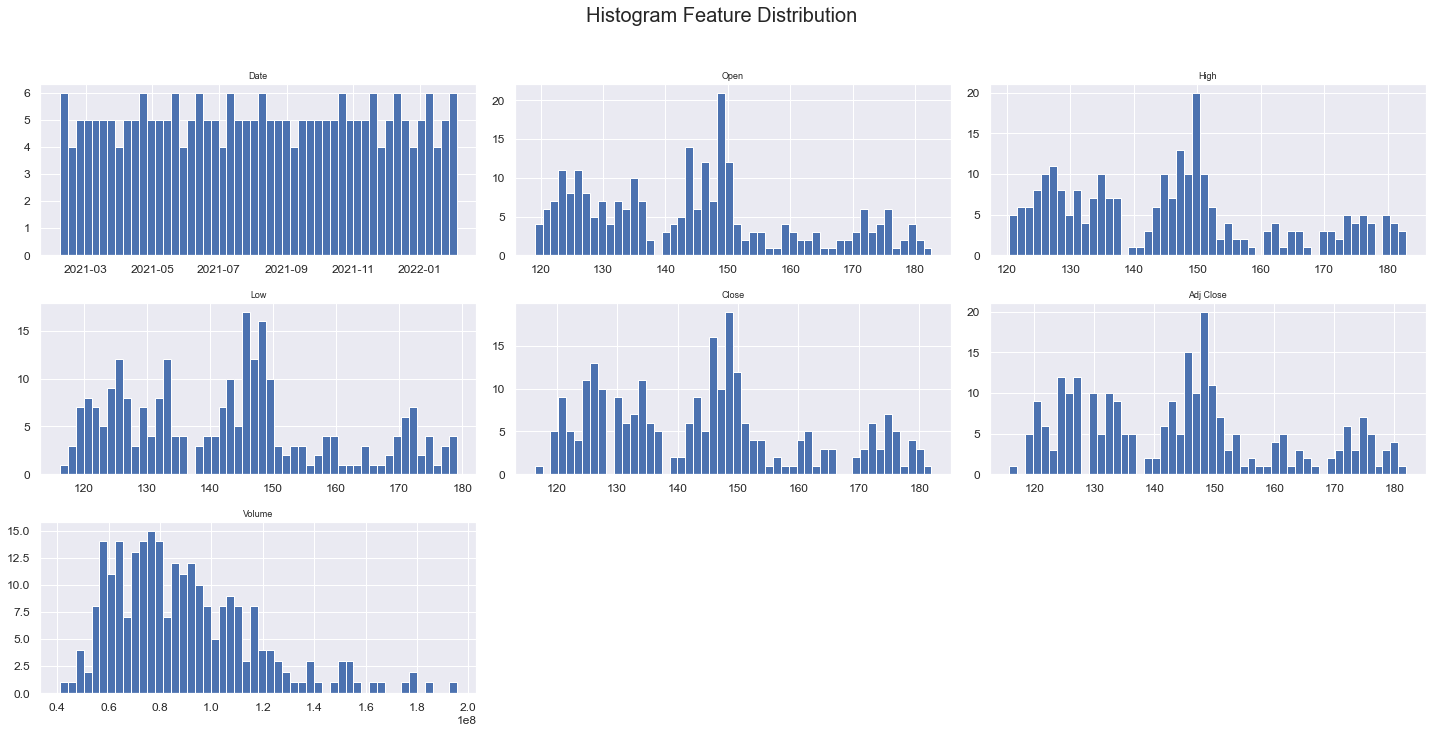

In [6]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

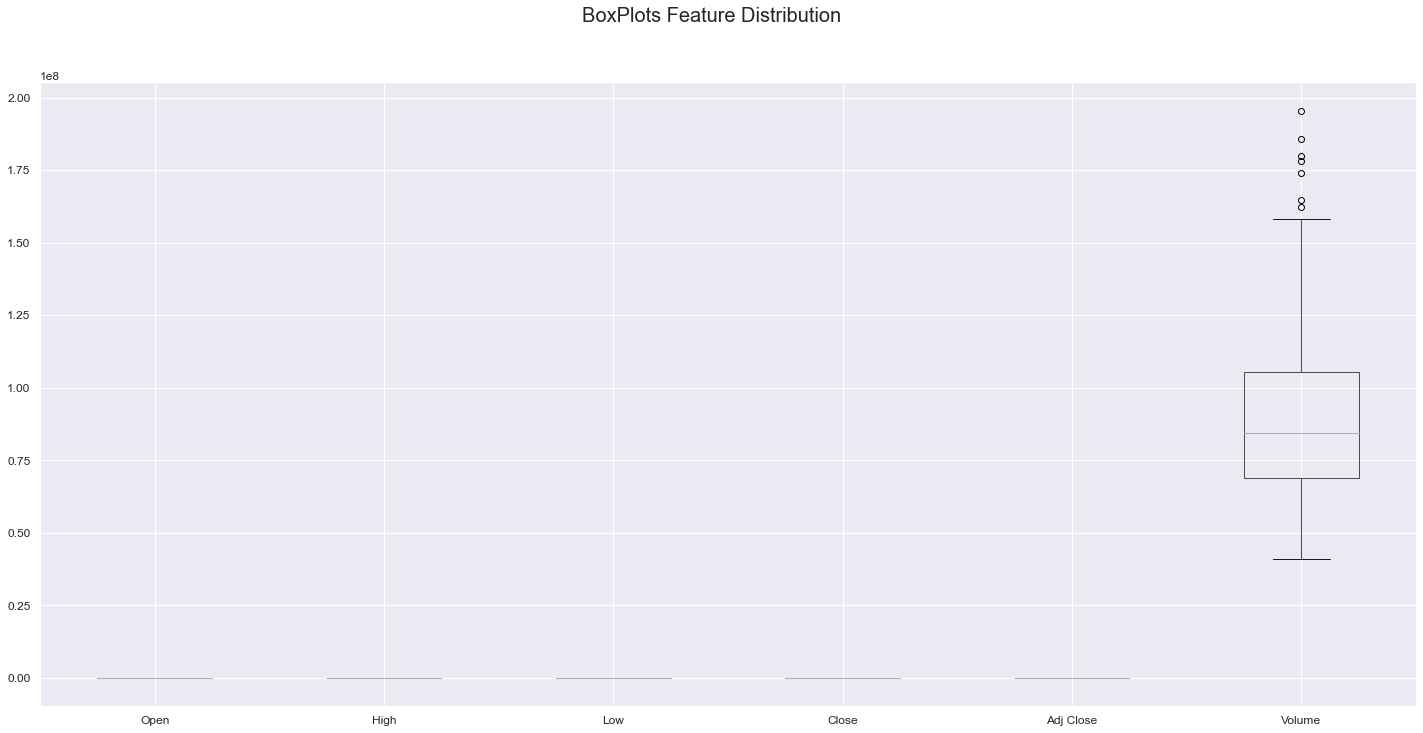

In [7]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Time-Series Analysis

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

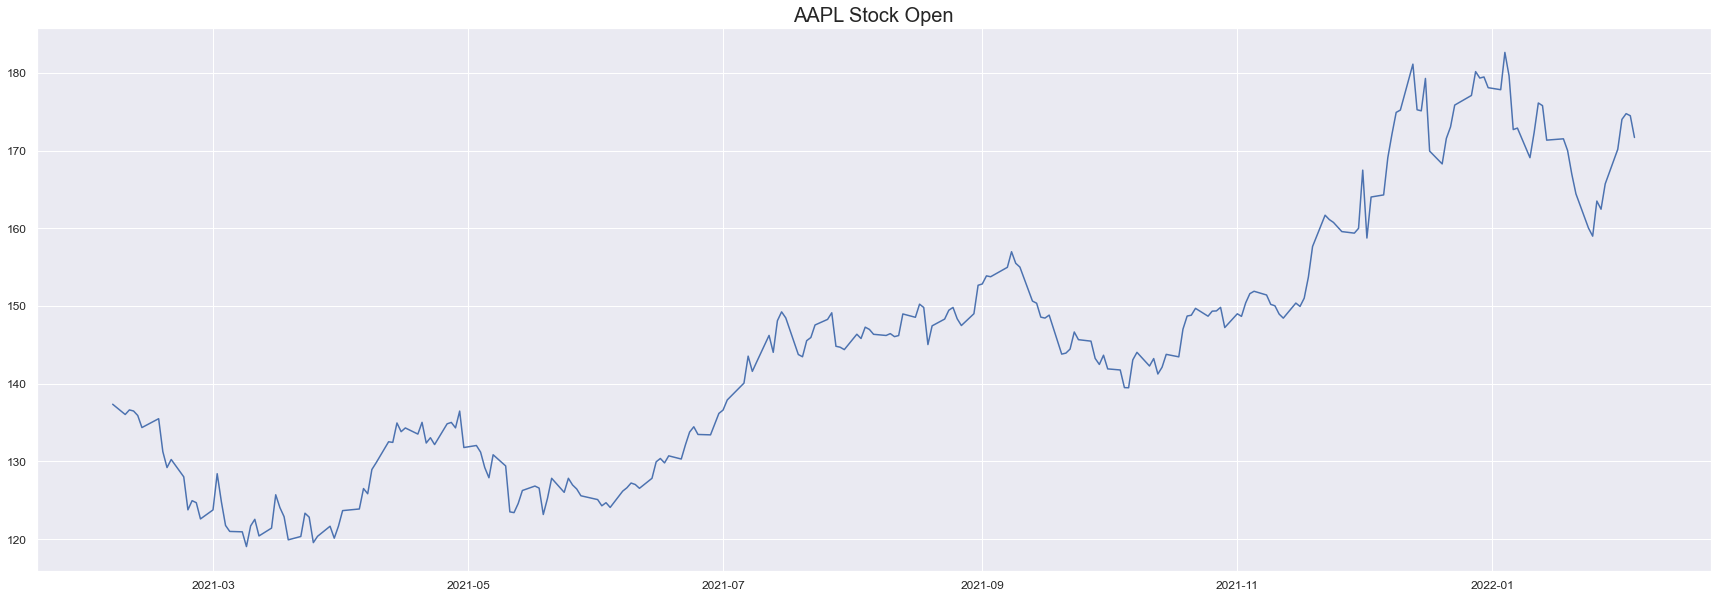

In [9]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date,y=df.Open, data=df, estimator=None)
plt.title("AAPL Stock Open", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
#plt.legend(['',''])
plt.show()

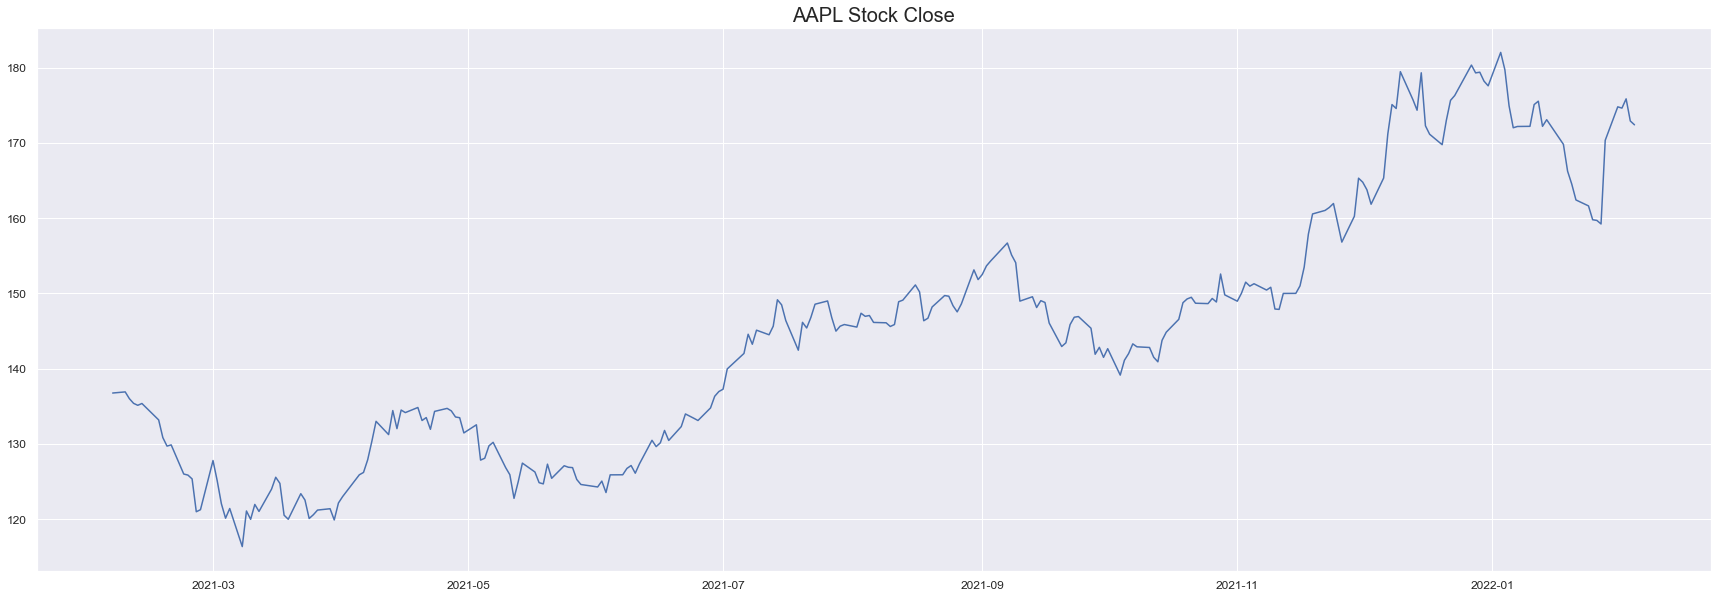

In [10]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date,y=df.Close, data=df, estimator=None)
plt.title("AAPL Stock Close", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
#plt.legend(['',''])
plt.show()

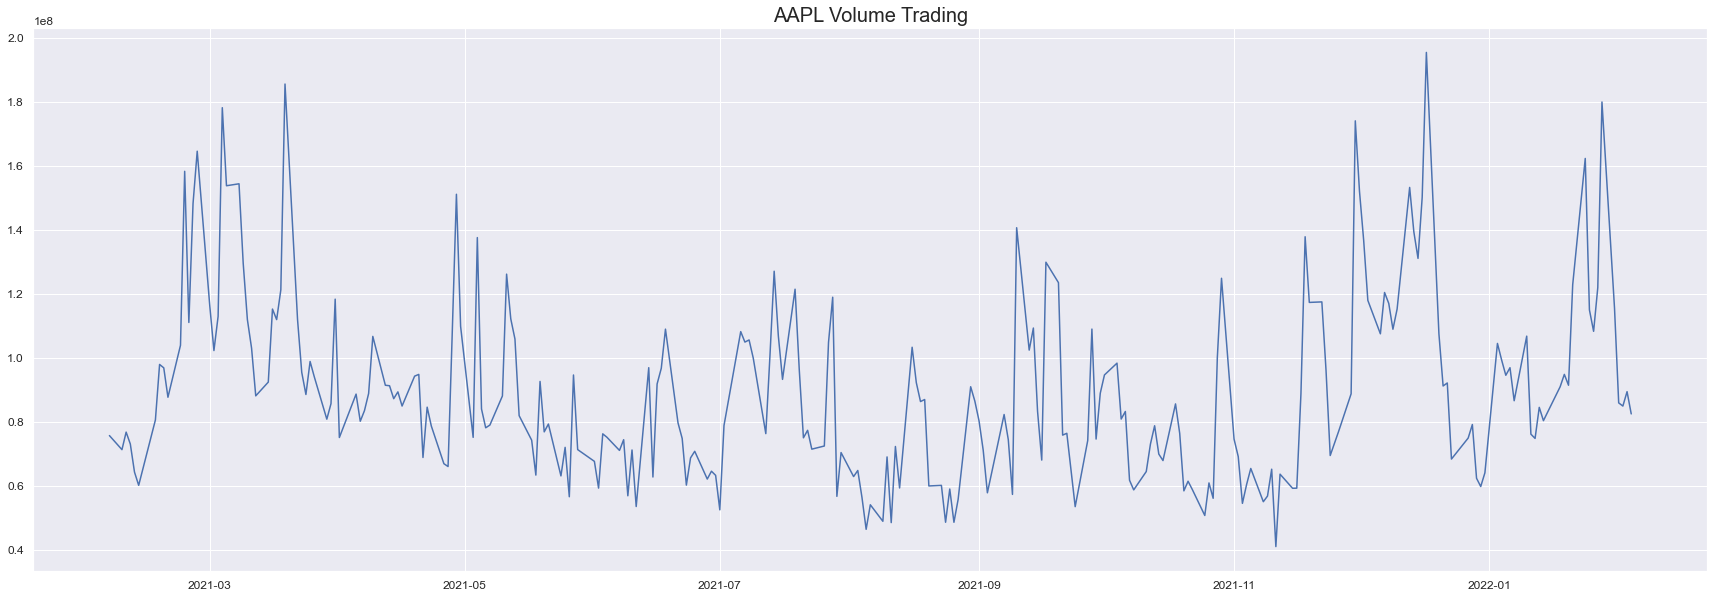

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date,y=df.Volume, data=df, estimator=None)
plt.title("AAPL Volume Trading", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
#plt.legend(['',''])
plt.show()

#### Python code done by Dennis Lam